In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
#supressing the scientific output
np.set_printoptions(suppress=True) 

In [674]:
f = open('BeijingPM20100101_20151231.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
# for line in rdr:
# #     print(type(line))
#     print(line)
feature_index = [5, 10,11,12,13, 15,16,17]
count = 0
data = []

df = pd.read_csv('BeijingPM20100101_20151231.csv', index_col='No')
# print(df.columns)
# print(df.values)
print(df.columns)
# print(df.loc[:,['year','season', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd',
#        'Iws', 'precipitation', 'Iprec']])
feature = df.loc[:,['year','season', 'DEWP', 'HUMI', 'PRES', 'TEMP']]
pred = df.loc[:,['PM_US Post']]
# pred = df.loc[:,['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']]
data = df.values
f.close()

Index(['year', 'month', 'day', 'hour', 'season', 'PM_Dongsi', 'PM_Dongsihuan',
       'PM_Nongzhanguan', 'PM_US Post', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd',
       'Iws', 'precipitation', 'Iprec'],
      dtype='object')


In [675]:
remove_col = []
line_num = 0
for line in data:
    if np.isnan(line[8]):
        remove_col.append(line_num)
    line_num += 1

# print(remove_col)
print(len(data))
for num in sorted(remove_col, reverse=True):
    data = np.delete(data, num, 0)
print(len(data))



52584
50387


In [676]:
# Break datasets into X and Y.
# X = data[::,0:2]
# Y = data[::,-1:]
feature_arr = feature.values
pred_arr = pred.values
for num in sorted(remove_col, reverse=True):
    feature_arr = np.delete(feature_arr, num, 0)
    pred_arr = np.delete(pred_arr, num, 0)

data_num = 5000
X = feature_arr[data_num:data_num*2,0:2]
Y = pred_arr[data_num:data_num*2,:]
print(feature_arr[-1], pred_arr[-1])
print(feature.columns)
print(pred.columns)
print(Y[:5], X[:5])

[2015.    4.   -9.   79. 1029.   -6.] [235.]
Index(['year', 'season', 'DEWP', 'HUMI', 'PRES', 'TEMP'], dtype='object')
Index(['PM_US Post'], dtype='object')
[[239.]
 [207.]
 [224.]
 [245.]
 [221.]] [[2010.    2.]
 [2010.    2.]
 [2010.    2.]
 [2010.    2.]
 [2010.    2.]]


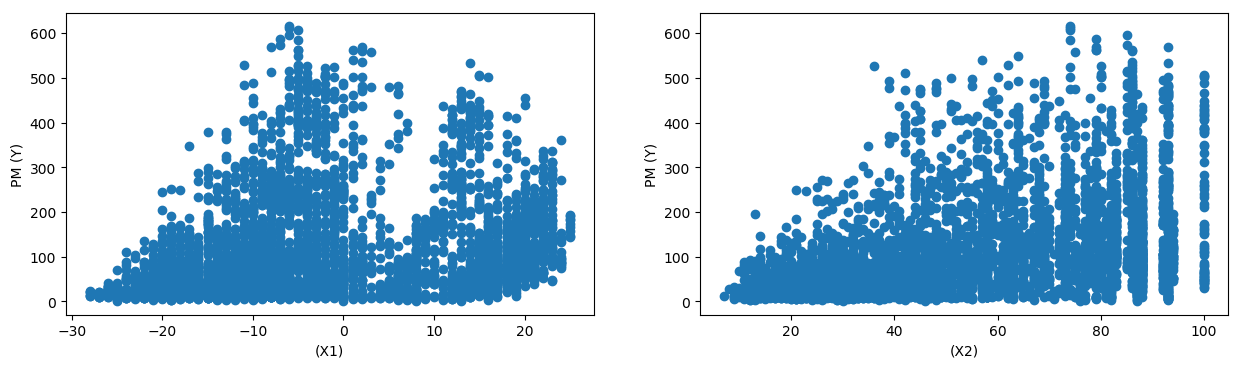

In [677]:
# Plotting example dataset
X = feature_arr[data_num:data_num*2,2:4]
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.scatter(X[::,0],Y)
plt.xlabel("(X1)")
plt.ylabel("PM (Y)")
plt.subplot(122)
plt.scatter(X[::,1],Y)
plt.xlabel("(X2)")
plt.ylabel("PM (Y)")
plt.show()

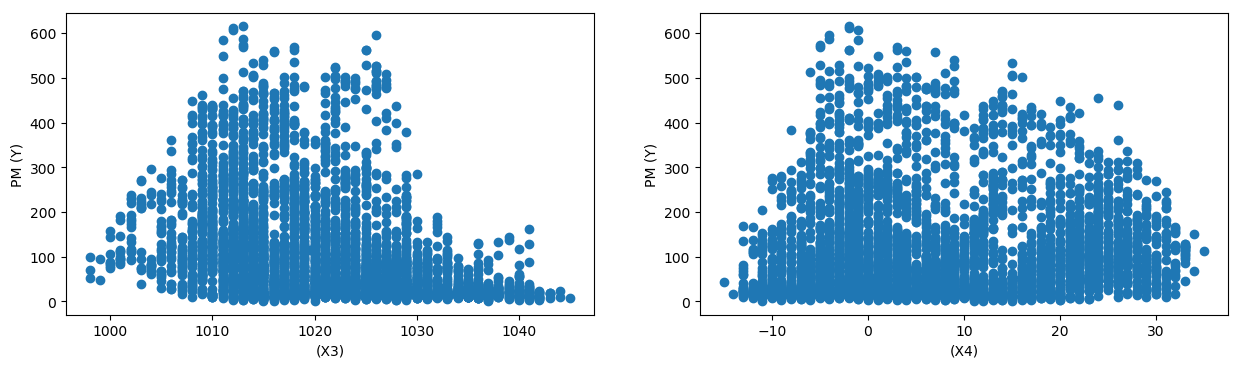

In [686]:
# Plotting example dataset
X = feature_arr[data_num:data_num*2,4:6]
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.scatter(X[::,0],Y)
plt.xlabel("(X3)")
plt.ylabel("PM (Y)")
plt.subplot(122)
plt.scatter(X[::,1],Y)
plt.xlabel("(X4)")
plt.ylabel("PM (Y)")
plt.show()

In [679]:
X = feature.values[data_num:data_num*2,2:4]

# introduce weights of hypothesis (randomly initialize)
Theta = np.random.rand(1,3)
# m is total example set , n is number of features
m,n = X.shape
# add bias to input matrix by simple make X0 = 1 for all
# X_bias = np.ones((m,n+1))
# print(X_bias.shape, X.shape)
# X_bias[::,1:] = X
X_bias = np.ones((m,1))
print(X_bias.shape, X.shape)
X_bias = np.concatenate((X_bias, X), axis=1)

# output first 5 X_bias examples
print ("X_bias = \n",X_bias[0:5,:])
print ("Y = \n",Y[0:5,::])

#feature scaling
# it also protect program from overflow error
mean_size = np.mean(X_bias[::,1:2])
mean_bedroom = np.mean(X_bias[::,2:])
size_std = np.std(X_bias[::,1:2])
bedroom_std = np.std(X_bias[::,2:])
# mean_Y = np.mean(Y)
# Y_std = np.std(Y)
print(mean_size, mean_bedroom, size_std, bedroom_std)
print('mean and std of Y :',mean_Y, Y_std)
mean_Y = 125
Y_std = 121
# Y = (Y - mean_Y) / Y_std
# Y = Y
print ("Y = \n",Y[0:5,::])
X_bias[::,1:2] = (X_bias[::,1:2] - mean_size)/ (size_std) 
X_bias[::,2:] = (X_bias[::,2:] - mean_bedroom)/ (bedroom_std)
len(Y)
# X_bias[0:5,::]

(5000, 1) (5000, 2)
X_bias = 
 [[ 1. 24. 78.]
 [ 1. 25. 79.]
 [ 1. 25. 74.]
 [ 1. 25. 66.]
 [ 1. 24. 56.]]
Y = 
 [[239.]
 [207.]
 [224.]
 [245.]
 [221.]]
-1.3944 55.0371 15.207197264453432 25.24897767415544
mean and std of Y : 125 121
Y = 
 [[239.]
 [207.]
 [224.]
 [245.]
 [221.]]


5000

In [680]:
#define function to find cost
def cost(X_bias,Y,Theta):
    np.seterr(over='raise')
    m,n = X.shape
    hypothesis = X_bias.dot(Theta.transpose())
    return (1/(2.0*m))*((np.square(hypothesis-Y)).sum(axis=0))

In [684]:
#function gradient descent algorithm from minimizing theta
def gradientDescent(X_bias,Y,Theta,iterations,alpha):
    print(mean_Y, Y_std)
    count = 1
    cost_log = np.array([])
    print(m)
    while(count <= iterations):
        hypothesis = X_bias.dot(Theta.transpose())
#         print(m, alpha, count , Theta, hypothesis[count], Y[count],)
        
        temp0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,1:2])).sum(axis=0)
        temp2 = Theta[0,2] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,-1:])).sum(axis=0)
        
        Theta[0,0] = temp0
        Theta[0,1] = temp1
        Theta[0,2] = temp2
#         print(Theta)
        cost_log = np.append(cost_log,cost(X_bias,Y,Theta))
        
#         print(X_bias[0])
        count = count + 1
        
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log)
    plt.title("Iteration vs Cost graph ")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost of Theta")
    plt.show()
    return Theta

50387
125 121
5000


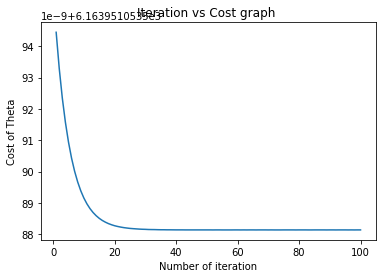

[[103.993       12.22529773   3.84661113]]


In [685]:
alpha = 0.3
iterations = 100
print(len(data))
Theta = gradientDescent(X_bias,Y,Theta,iterations,alpha)
print(Theta)

In [683]:
# predict the price of a house with 1650 square feet and 3 bedrooms
# add bias unit 1.0
X_predict = np.array([1.,79, 1029]) 
#feature scaling the data first
X_predict[1] = (X_predict[1] - mean_size)/ (size_std) 
X_predict[2] = (X_predict[2]- mean_bedroom)/ (bedroom_std)
hypothesis = X_predict.dot(Theta.transpose())
print(hypothesis)
# hypothesis = hypothesis*Y_std + mean_Y
print("Cost of house with 1650 sq ft and 3 bedroom is ",hypothesis)

[317.00897305]
Cost of house with 1650 sq ft and 3 bedroom is  [317.00897305]
